
# DEEP EUTECTIC SOLVENTS MELTING TEMPERATURE. 
# Data preparation and EDA


# 1. Reading data

In [1]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading data
melt_temp_df = pd.read_csv('DES_TMELT_V.csv')
melt_temp_df = melt_temp_df.round({'X#1 (molar fraction)': 3, 'X#2 (molar fraction)': 3}) # Rounding of molar fractions
melt_temp_df.rename(columns = {'Tmelt, K':'Melting temperature',}, inplace = True )
melt_temp_df.head()

,Unnamed: 0,Number of components,Type of DES,Component#1,Smiles#1,T#1,Component#2,Smiles#2,T#2,X#1 (molar fraction),X#2 (molar fraction),Melting temperature,Reference (DOI)
0,0,2,NaN,NaN,Cl[Fe](Cl)Cl,580.15,NaN,C[N+](C)(C)CCO.[Cl-],575.15,0.67,0.33,294.15,NaN
1,1,2,NaN,NaN,Br[Zn]Br,667.15,NaN,CC(=O)[O-].C[N+](C)(C)CCO,324.15,0.67,0.33,321.15,NaN
2,2,2,NaN,NaN,Br[Zn]Br,567.15,NaN,C[N+](C)(C)CCO.[Cl-],575.15,0.67,0.33,311.15,NaN
3,3,2,NaN,NaN,Cl[Zn]Cl,563.15,NaN,C[N+](C)(C)CCCl.Cl,513.15,0.67,0.33,296.15,NaN
4,4,2,NaN,NaN,Cl[Zn]Cl,563.15,NaN,C[N+](C)(C)CCO.[Cl-],575.15,0.50,0.50,314.77,NaN


### **A database containing 2628 rows was collected**

In [3]:
melt_temp_df.info() #Table Information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2628 entries, 0 to 2627
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            2628 non-null   int64  
 1   Number of components  2628 non-null   int64  
 2   Type of DES           2231 non-null   object 
 3   Component#1           2231 non-null   object 
 4   Smiles#1              2628 non-null   object 
 5   T#1                   2627 non-null   float64
 6   Component#2           2231 non-null   object 
 7   Smiles#2              2628 non-null   object 
 8   T#2                   2624 non-null   float64
 9   X#1 (molar fraction)  2628 non-null   float64
 10  X#2 (molar fraction)  2628 non-null   float64
 11  Melting temperature   2628 non-null   float64
 12  Reference (DOI)       2231 non-null   object 
dtypes: float64(5), int64(2), object(6)
memory usage: 267.0+ KB


In [4]:
melt_temp_df.describe() #Main characteristics of numeric columns

,Unnamed: 0,Number of components,T#1,T#2,X#1 (molar fraction),X#2 (molar fraction),Melting temperature
count,2628.000000,2628.0,2627.000000,2624.000000,2628.000000,2628.000000,2628.000000
mean,1332.994673,2.0,481.096955,354.245286,0.466860,0.533148,339.664364
std,768.512381,0.0,115.635239,73.200737,0.243522,0.243533,77.517887
min,0.000000,2.0,199.150000,223.150000,0.036000,0.044000,77.903200
25%,664.750000,2.0,344.000000,309.150000,0.259500,0.330000,294.345750
50%,1336.500000,2.0,519.150000,329.150000,0.446000,0.554000,321.700000
75%,1998.250000,2.0,578.150000,382.500000,0.670000,0.740500,368.577500
max,2659.000000,2.0,667.150000,633.150000,0.956000,0.964000,603.000000


# 2. Data analysis
To understand what data is presented in the database, we will conduct a preliminary data analysis

## 2.1. Amount of data

### 2.1.1. The ratio of binary and tertiary systems
Let's build a pie chart to find out the ratio of binary and tertiary systems

In [5]:
# Grouping by the number of system components
bin_ter = melt_temp_df[['Number of components', 'Type of DES', 'Melting temperature']].groupby(['Number of components', 'Type of DES']).agg('count') 
bin_ter

Melting temperature
Number of components Type of DES                     
2                    1                             46
                     2                             11
                     3                           1166
                     4                            103
                     5                            706
                     IL                           199

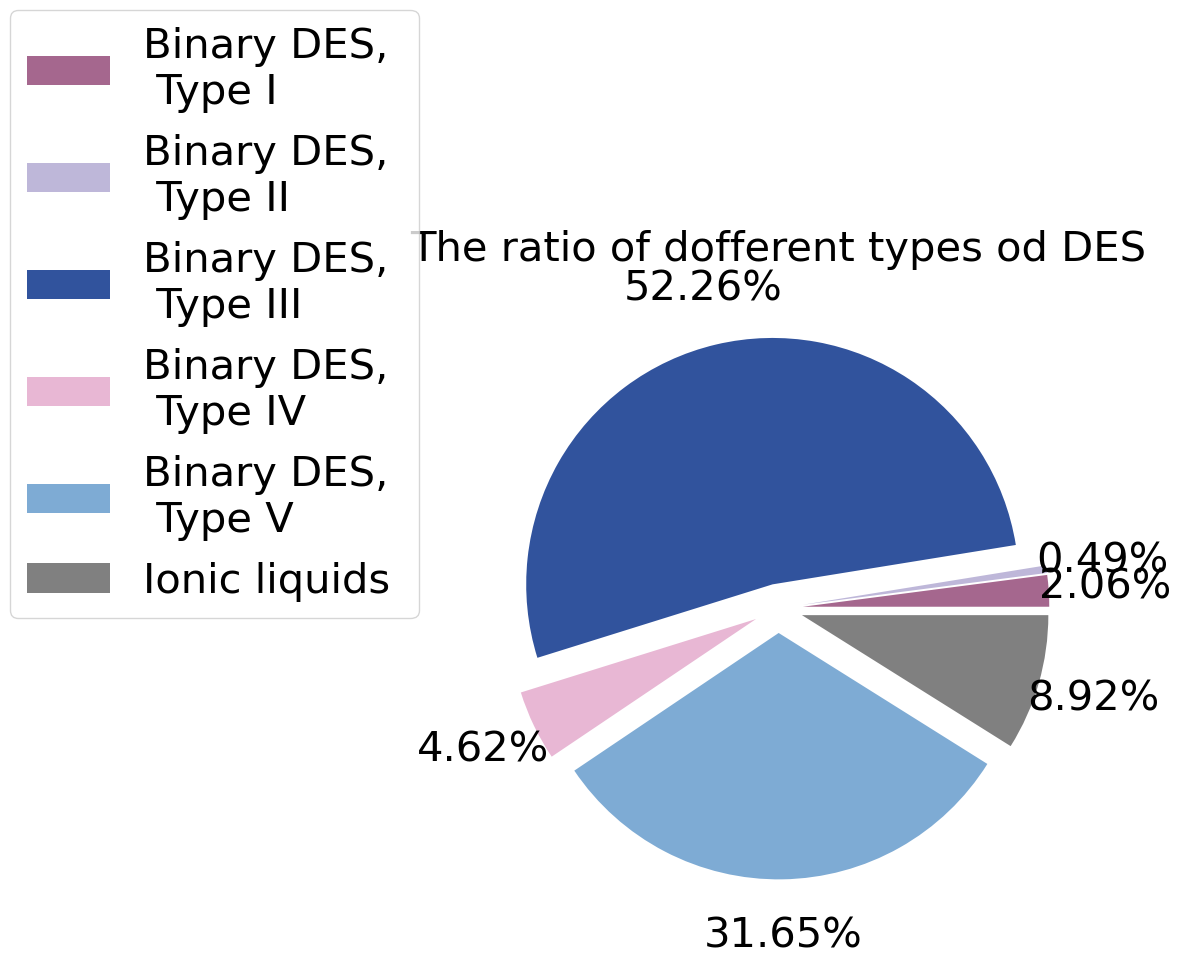

In [6]:
colors = ['#a5678e', '#beb7d9', '#31539d','#e8b7d4', '#7eabd4', 'gray'] # Palette of colors
fig, ax = plt.subplots(figsize = (12, 8)) #Initialization - creating an empty graph
labels = ['Binary DES,\n Type I','Binary DES, \n Type II', 'Binary DES, \n Type III', 'Binary DES, \n Type IV', 'Binary DES,\n Type V', 'Ionic liquids']
ax.pie(bin_ter['Melting temperature'], colors = colors, autopct = '%1.2f%%', textprops={'fontsize': 30}, explode=[0.1, 0.1, 0.1, 0.1, 0.1, 0.1], pctdistance=1.23, radius=1) #Change names, colors, add%, increase font
plt.legend(
    bbox_to_anchor = (-0.3, 0.45, 0.25, 0.25),
    loc = 'best', labels = labels, fontsize = 30)
ax.set_title('The ratio of dofferent types od DES', fontsize = 30, y=1.05) #Title of a separate chart
plt.show() #Graph demonstration

It can be seen that most systems are binary, this is explained by a small number of articles about tertiary DES.

Most systems belong to type III and V, as they are more often studied by scientists. There are no type II systems, since due to the fact that they consist of hydrate and ammonium salt, it is more correct to add them to tertiary systems, where the third component will be water

### 2.1.2. The most popular components of binary systems


#### 2.1.2.1. The most popular acceptor

In [7]:
#Table for the number of unique systems in various articles
max_comp = melt_temp_df[melt_temp_df['Number of components'] == 2][['Component#1','Component#2', 'Reference (DOI)']].groupby(['Component#1','Component#2']).agg('nunique')
max_comp = max_comp.sort_values('Reference (DOI)', ascending = False)
#To understand the number of times a particular acceptor participates in various systems, we reset the indexes and regroup the samples
max_comp.reset_index(level=[0,1], inplace = True)
#Regrouping
max_acceptor = max_comp[['Component#1', 'Reference (DOI)']].groupby('Component#1').agg('sum')
max_acceptor = max_acceptor.sort_values('Reference (DOI)', ascending = False)
max_acceptor['Component#1'] = max_acceptor.index
f_get_upper = lambda x: x.upper()
max_acceptor['Component#1'] = max_acceptor['Component#1'].apply(f_get_upper)
max_acceptor.index = max_acceptor['Component#1']
max_acceptor

,Reference (DOI),Component#1
Component#1,,
2-HYDROXYETHYL(TRIMETHYL)AZANIUM;CHLORIDE,104,2-HYDROXYETHYL(TRIMETHYL)AZANIUM;CHLORIDE
TETRABUTYLAZANIUM;CHLORIDE,21,TETRABUTYLAZANIUM;CHLORIDE
"(1R,2S,5R)-5-METHYL-2-PROPAN-2-YLCYCLOHEXAN-1-OL",20,"(1R,2S,5R)-5-METHYL-2-PROPAN-2-YLCYCLOHEXAN-1-OL"
5-METHYL-2-PROPAN-2-YLPHENOL,17,5-METHYL-2-PROPAN-2-YLPHENOL
2-(TRIMETHYLAZANIUMYL)ACETATE,17,2-(TRIMETHYLAZANIUMYL)ACETATE
...,...,...
NONANOIC ACID,1,NONANOIC ACID
LITHIUM;HEXAFLUOROPHOSPHATE,1,LITHIUM;HEXAFLUOROPHOSPHATE
HYDROGEN SULFATE;TETRABUTYLAZANIUM,1,HYDROGEN SULFATE;TETRABUTYLAZANIUM


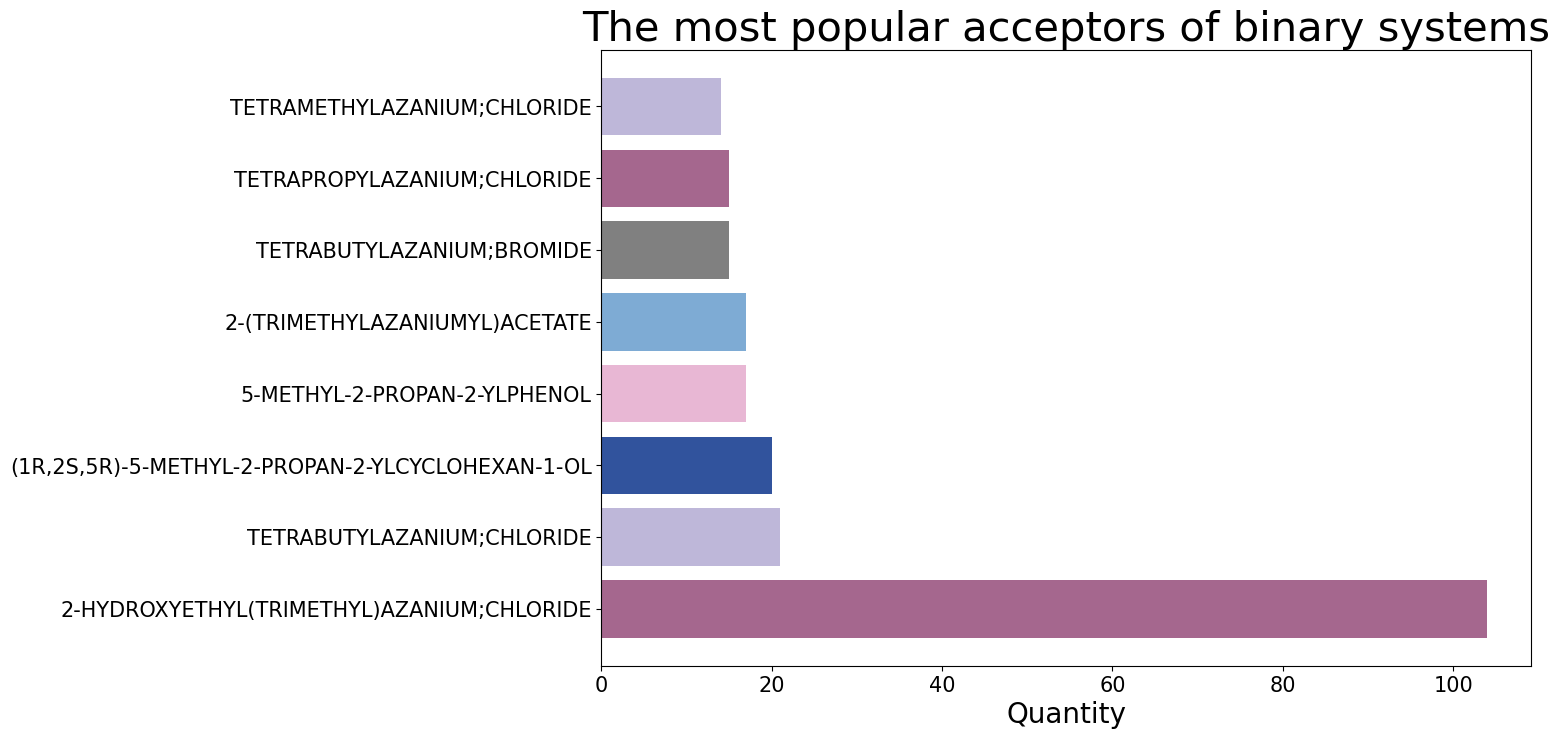

In [8]:
fig, ax = plt.subplots(figsize = (12, 8)) # Chart initialization
ax.barh(max_acceptor.head(8).index, max_acceptor.head(8)['Reference (DOI)'], color = colors) # Building a bar chart
ax.set_title('The most popular acceptors of binary systems', fontsize = 30) # Title
ax.set_xlabel('Quantity', fontsize = 20) # X-axis signature
ax.set_yticks(max_acceptor.index[0:8])
ax.tick_params(axis='both', which='major', labelsize=15)
plt.show() #Demonstration

The most popular acceptor is 2-HYDROXYETHYL(TRIMETHYL)AZANIUM;CHLORIDE, 105 entries correspond to it

#### 2.1.2.2. The most popular donor

In [9]:
#To understand the number of times a particular donor participates in various systems, we reset the indexes and regroup the samples
max_donor = max_comp[['Component#2', 'Reference (DOI)']].groupby('Component#2').agg('sum')
max_donor = max_donor.sort_values('Reference (DOI)', ascending = False) #Sort in descending order
max_donor['Component#2'] = max_donor.index
f_get_upper = lambda x: x.upper()
max_donor['Component#2'] = max_donor['Component#2'].apply(f_get_upper)
max_donor.index = max_donor['Component#2']
max_donor
max_donor

,Reference (DOI),Component#2
Component#2,,
DECANOIC ACID,32,DECANOIC ACID
DODECANOIC ACID,31,DODECANOIC ACID
UREA,27,UREA
"PROPANE-1,2,3-TRIOL",23,"PROPANE-1,2,3-TRIOL"
"ETHANE-1,2-DIOL",17,"ETHANE-1,2-DIOL"
...,...,...
TETRABUTYLAZANIUM;CHLORIDE,1,TETRABUTYLAZANIUM;CHLORIDE
TETRABUTYLPHOSPHANIUM;BROMIDE,1,TETRABUTYLPHOSPHANIUM;BROMIDE
TETRAMETHYLAZANIUM;CHLORIDE,1,TETRAMETHYLAZANIUM;CHLORIDE


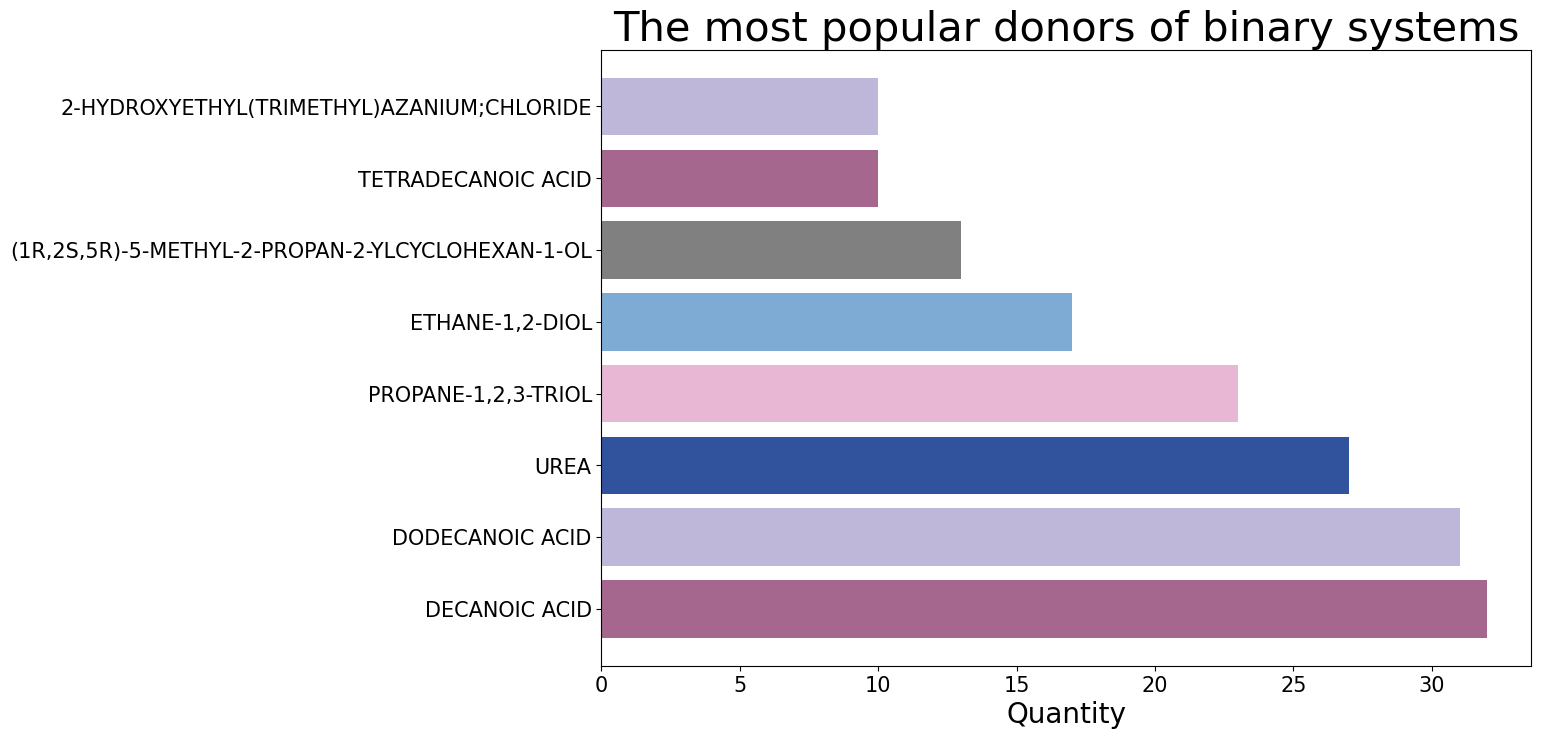

In [10]:
fig, ax = plt.subplots(figsize = (12, 8)) # Chart initialization
ax.barh(max_donor.head(8).index, max_donor.head(8)['Reference (DOI)'], color = colors) # Building a bar chart
ax.set_title('The most popular donors of binary systems', fontsize = 30) # Title
ax.set_xlabel('Quantity', fontsize = 20) # X-axis signature
ax.tick_params(axis='both', which='major', labelsize=15)
plt.show() #Demonstration

The distribution of donors is more uniform, the most popular are Urea, Dodecanoic acid, Decanoic acid

#### 2.1.2.3. The most popular system


In [11]:
#Grouping by two components
popular_system = melt_temp_df[melt_temp_df['Number of components'] == 2][['Component#1', 'Component#2', 'Melting temperature']].groupby(['Component#1', 'Component#2']).agg('count')
popular_system = popular_system.sort_values('Melting temperature', ascending = False) #Sort in descending order
popular_system.head(50)

Melting temperature
Component#1                                      Component#2                                                          
5-methyl-2-propan-2-ylphenol                     (1R,2S,5R)-5-methyl-2-propan-2-ylcyclohexan-1-ol                   34
lithium;nitrate                                  N-methylacetamide                                                  32
2-hydroxyethyl(trimethyl)azanium;chloride        octadecan-1-ol                                                     27
tetraethylazanium;chloride                       dodecanoic acid                                                    24
tetrapropylazanium;chloride                      dodecanoic acid                                                    22
tetraethylazanium;chloride                       hexadecanoic acid                                                  21
2-hydroxyethyl(trimethyl)azanium;chloride        1-butyl-1-methylpyrrolidin-1-ium;chloride                          20
                                                 pentanedioic acid                                                  19
                                                 tetradecanoic acid                                                 19
                                                 2-hydroxyacetic acid                                               19
                                                 1-butylpyridin-1-ium;chloride                                      18
                                                 2-(3-methylimidazol-3-ium-1-yl)ethanol;chloride                    18
                                                 decanoic acid                                                      18
                                                 benzyl-(2-hydroxyethyl)-dimethylazanium;chloride                   18
                                                 ethane-1,2-diol                                                    18
                                                 hexadecanoic acid                                                  18
                                                 2-hydroxypropane-1,2,3-tricarboxylic acid                          18
                                                 2-hydroxybutanedioic acid                                          18
(1R,2S,5R)-5-methyl-2-propan-2-ylcyclohexan-1-ol decanoic acid                                                      18
2-hydroxyethyl(trimethyl)azanium;chloride        1-ethyl-3-methylimidazol-3-ium;chloride                            18
                                                 2-hydroxyethyl(trimethyl)azanium;acetate                           17
hexadecanoic acid                                tetradecanoic acid                                                 17
2-hydroxyethyl(trimethyl)azanium;chloride        (2R,3R,4R,5S)-hexane-1,2,3,4,5,6-hexol                             17
                                                 tetrabutylazanium;chloride                                         17
tetramethylazanium;chloride                      dodecanoic acid                                                    17
2-hydroxyethyl(trimethyl)azanium;chloride        (2S,3R)-butane-1,2,3,4-tetrol                                      16
chromium(3+);trichloride;hexahydrate             urea                                                               16
tetrapropylazanium;chloride                      hexadecanoic acid                                                  16
2-hydroxyethyl(trimethyl)azanium;chloride        hexadecan-1-ol                                                     15
                                                 2,3-dihydroxybutanedioic acid                                      15
(1R,2S,5R)-5-methyl-2-propan-2-ylcyclohexan-1-ol octanoic acid                                                      15
tetraethylazanium;chloride                       tetradecanoic acid                                                 15
2-hydroxyethyl(trimethyl)azanium;chloride        dode

The most popular system is 5-methyl-2-propan-2-ylphenol and	(1R,2S,5R)-5-methyl-2-propan-2-ylcyclohexan-1-ol

## 2.2. Distribution of melting temperature values
At this stage we will consider the distribution of melting temperature values

### 2.2.1. Melting temperature distribution for all values

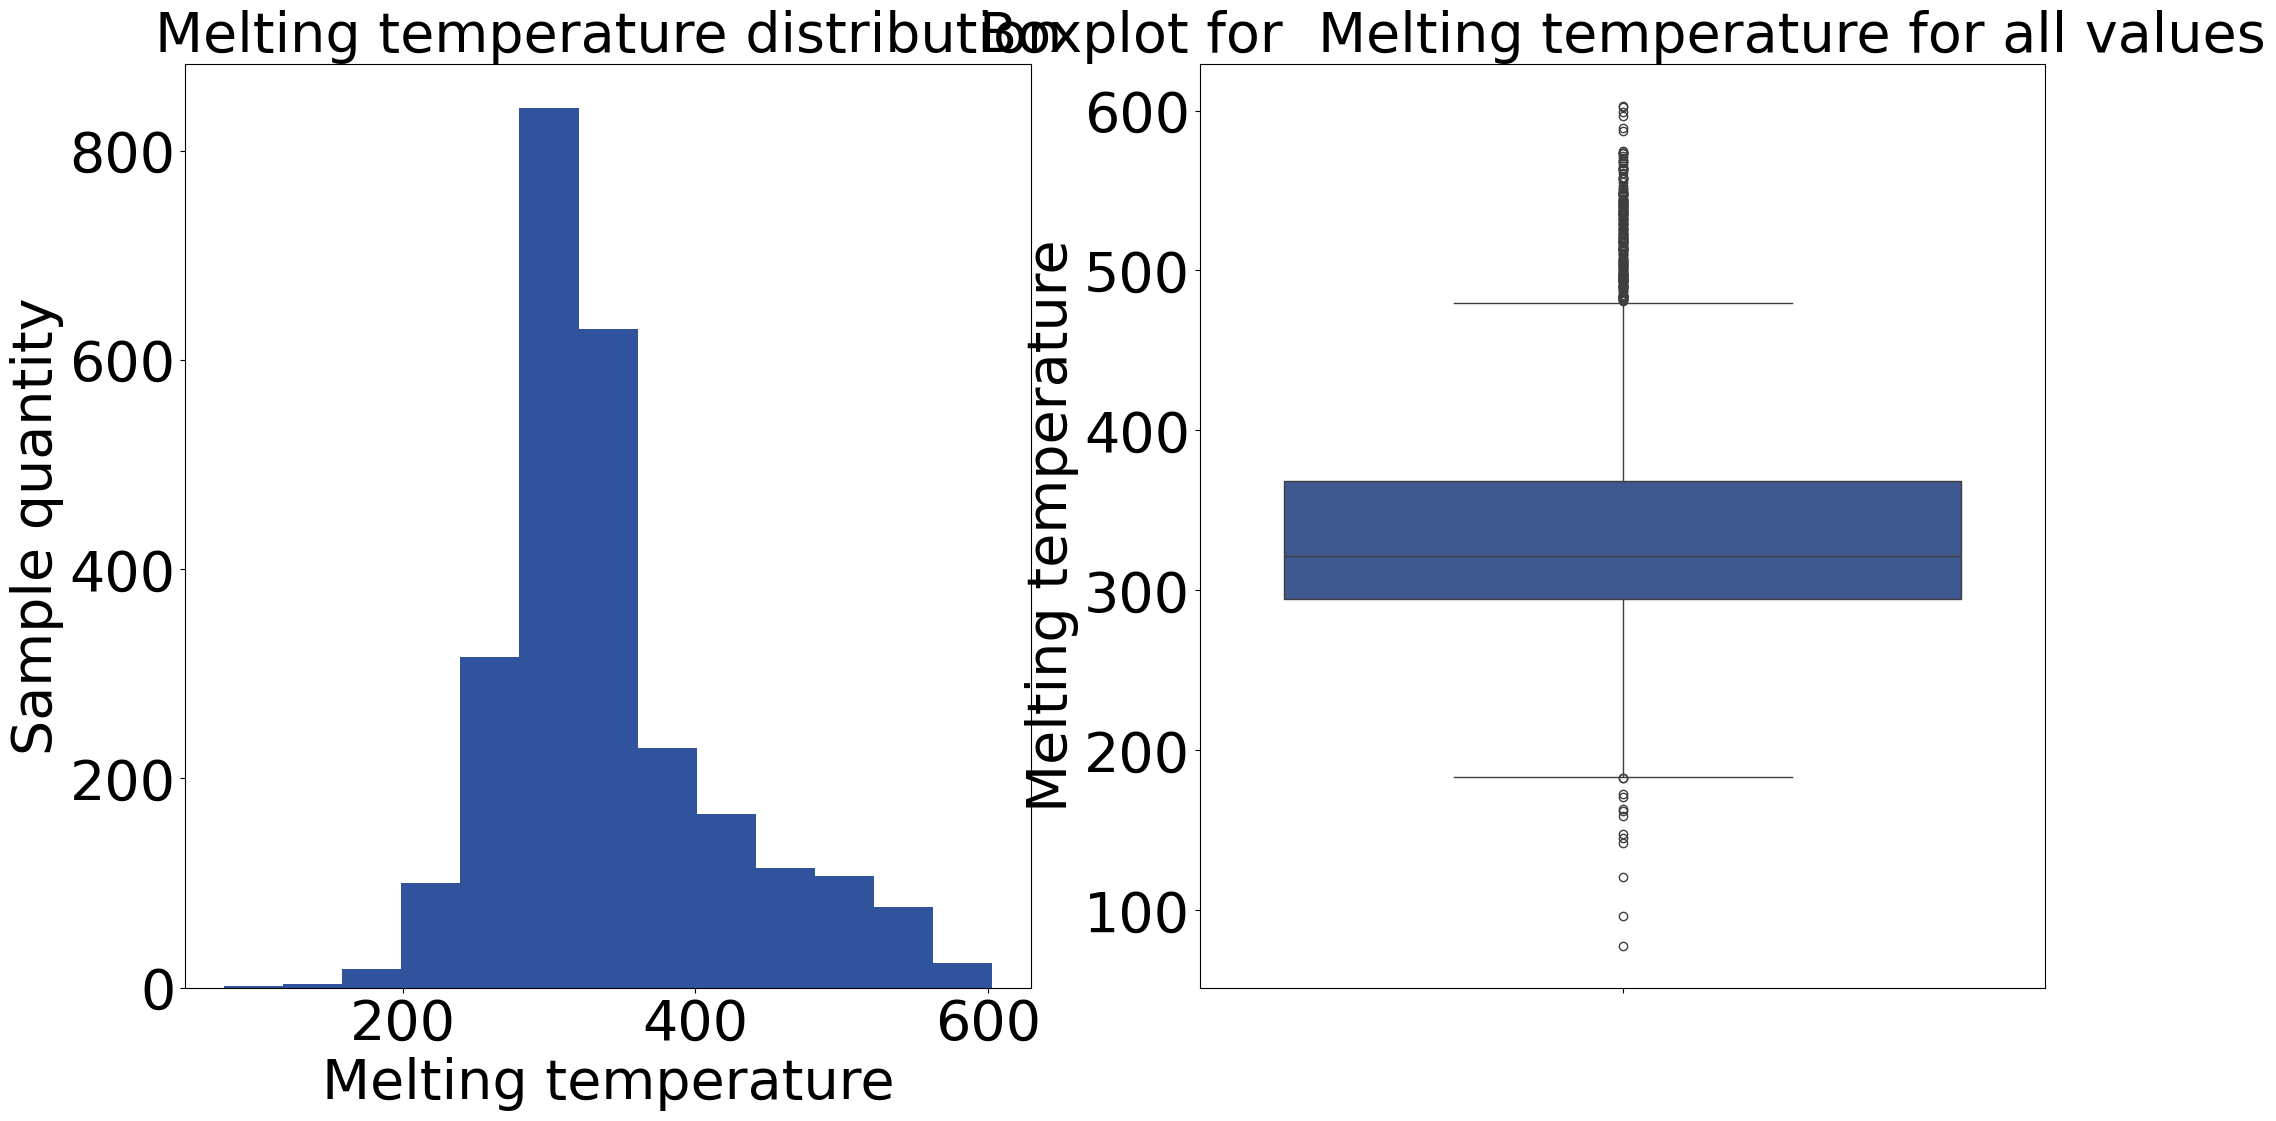

In [12]:
fig_time, ax_time = plt.subplots(nrows = 1, ncols = 2, figsize = (24, 12)) # Initialization
ax_time[0].hist(melt_temp_df['Melting temperature'], color = colors[2], bins = 13) # Building a histogram
ax_time[0].set_title('Melting temperature distribution', fontsize=40) #Title
ax_time[0].set_xlabel('Melting temperature', fontsize=40) #X-axis signature
ax_time[0].set_ylabel('Sample quantity', fontsize=40) #Y-axis signature
ax_time[0].tick_params(axis='both', which='major', labelsize=40)
ax_time[1]= sns.boxplot(y = melt_temp_df['Melting temperature'], color= colors[2]) #Building a boxplot
ax_time[1].set_title('Boxplot for  Melting temperature for all values', fontsize=40) #Title
ax_time[1].set_ylabel('Melting temperature', fontsize=40) #Y-axis signature
ax_time[1].tick_params(axis='both', which='major', labelsize=40)
plt.show() #Demonstration

### 2.2.2. Melting point distribution for different types of binary systems

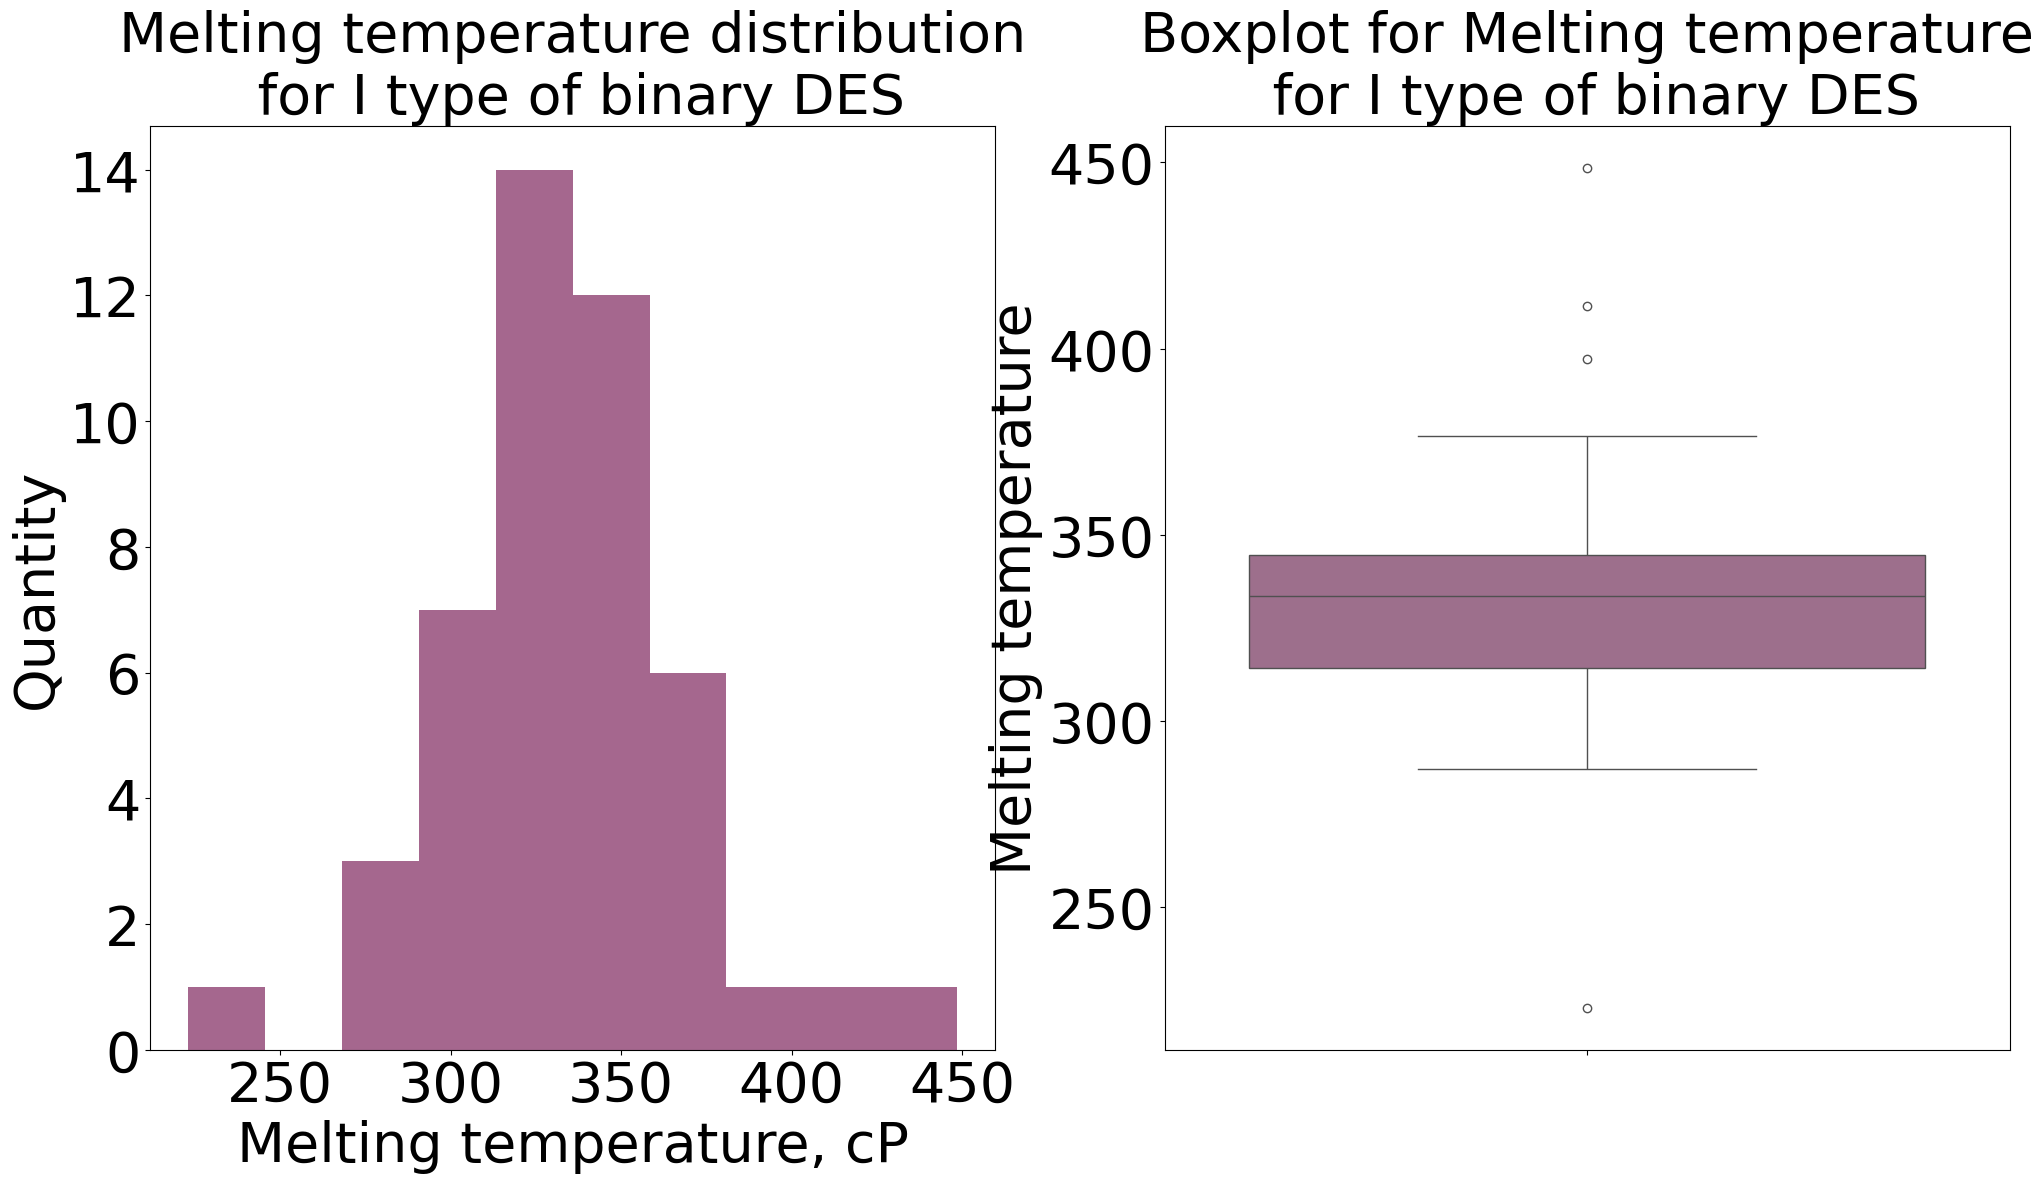

In [13]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (24, 12)) # Initialization
ax[0].hist(melt_temp_df[melt_temp_df['Type of DES'] == '1']['Melting temperature'], color = colors[0]) # Building a histogram
ax[0].set_title('Melting temperature distribution\n for I type of binary DES', fontsize=40) #Title
ax[0].set_xlabel('Melting temperature, cP', fontsize=40) #X-axis signature
ax[0].set_ylabel('Quantity', fontsize=40) #Y-axis signature
ax[0].tick_params(axis='both', which='major', labelsize=40)
ax[1] = sns.boxplot(y = melt_temp_df[melt_temp_df['Type of DES'] == '1']['Melting temperature'], color = colors[0]) #Building a boxplot
ax[1].set_title('Boxplot for Melting temperature\n for I type of binary DES', fontsize=40) #Title
ax[1].set_ylabel('Melting temperature', fontsize=40) #Y-axis signature
ax[1].tick_params(axis='both', which='major', labelsize=40)
plt.show() #Demonstration

There is little DES type I data in the table, so the distribution is interrupted

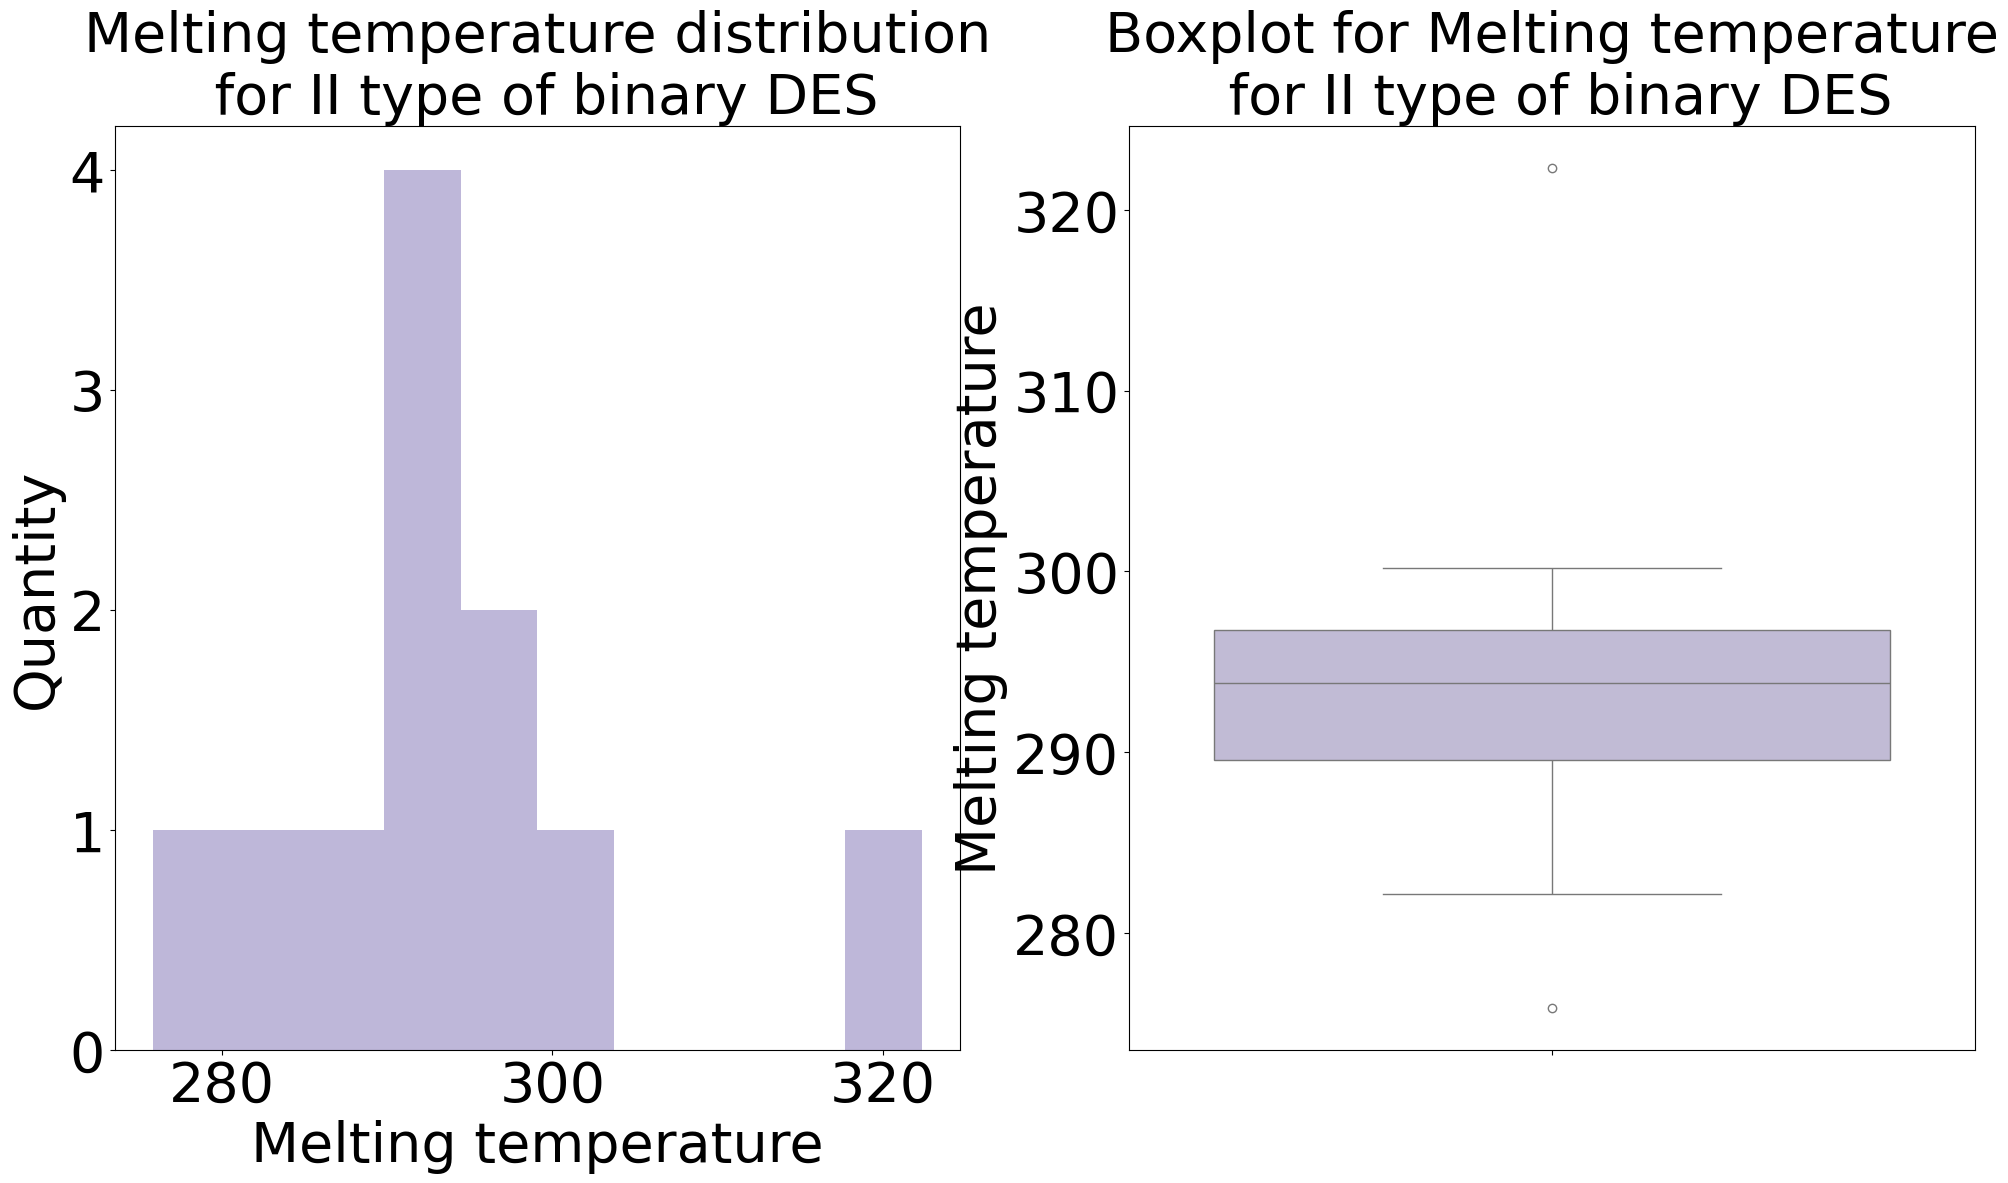

In [14]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (24, 12)) # Initialization
ax[0].hist(melt_temp_df[melt_temp_df['Type of DES'] == '2']['Melting temperature'], color = colors[1]) # Building a histogram
ax[0].set_title('Melting temperature distribution\n for II type of binary DES', fontsize=40) #Title
ax[0].set_xlabel('Melting temperature', fontsize=40) #X-axis signature
ax[0].set_ylabel('Quantity', fontsize=40) #Y-axis signature
ax[0].tick_params(axis='both', which='major', labelsize=40)
ax[1] = sns.boxplot(y = melt_temp_df[melt_temp_df['Type of DES'] == '2']['Melting temperature'], color = colors[1]) #Building a boxplot
ax[1].set_title('Boxplot for Melting temperature\n for II type of binary DES', fontsize=40) #Title
ax[1].set_ylabel('Melting temperature', fontsize=40) #Y-axis signature
ax[1].tick_params(axis='both', which='major', labelsize=40)
plt.show() #Demonstration

There is little DES type II data in the table, so the distribution is interrupted

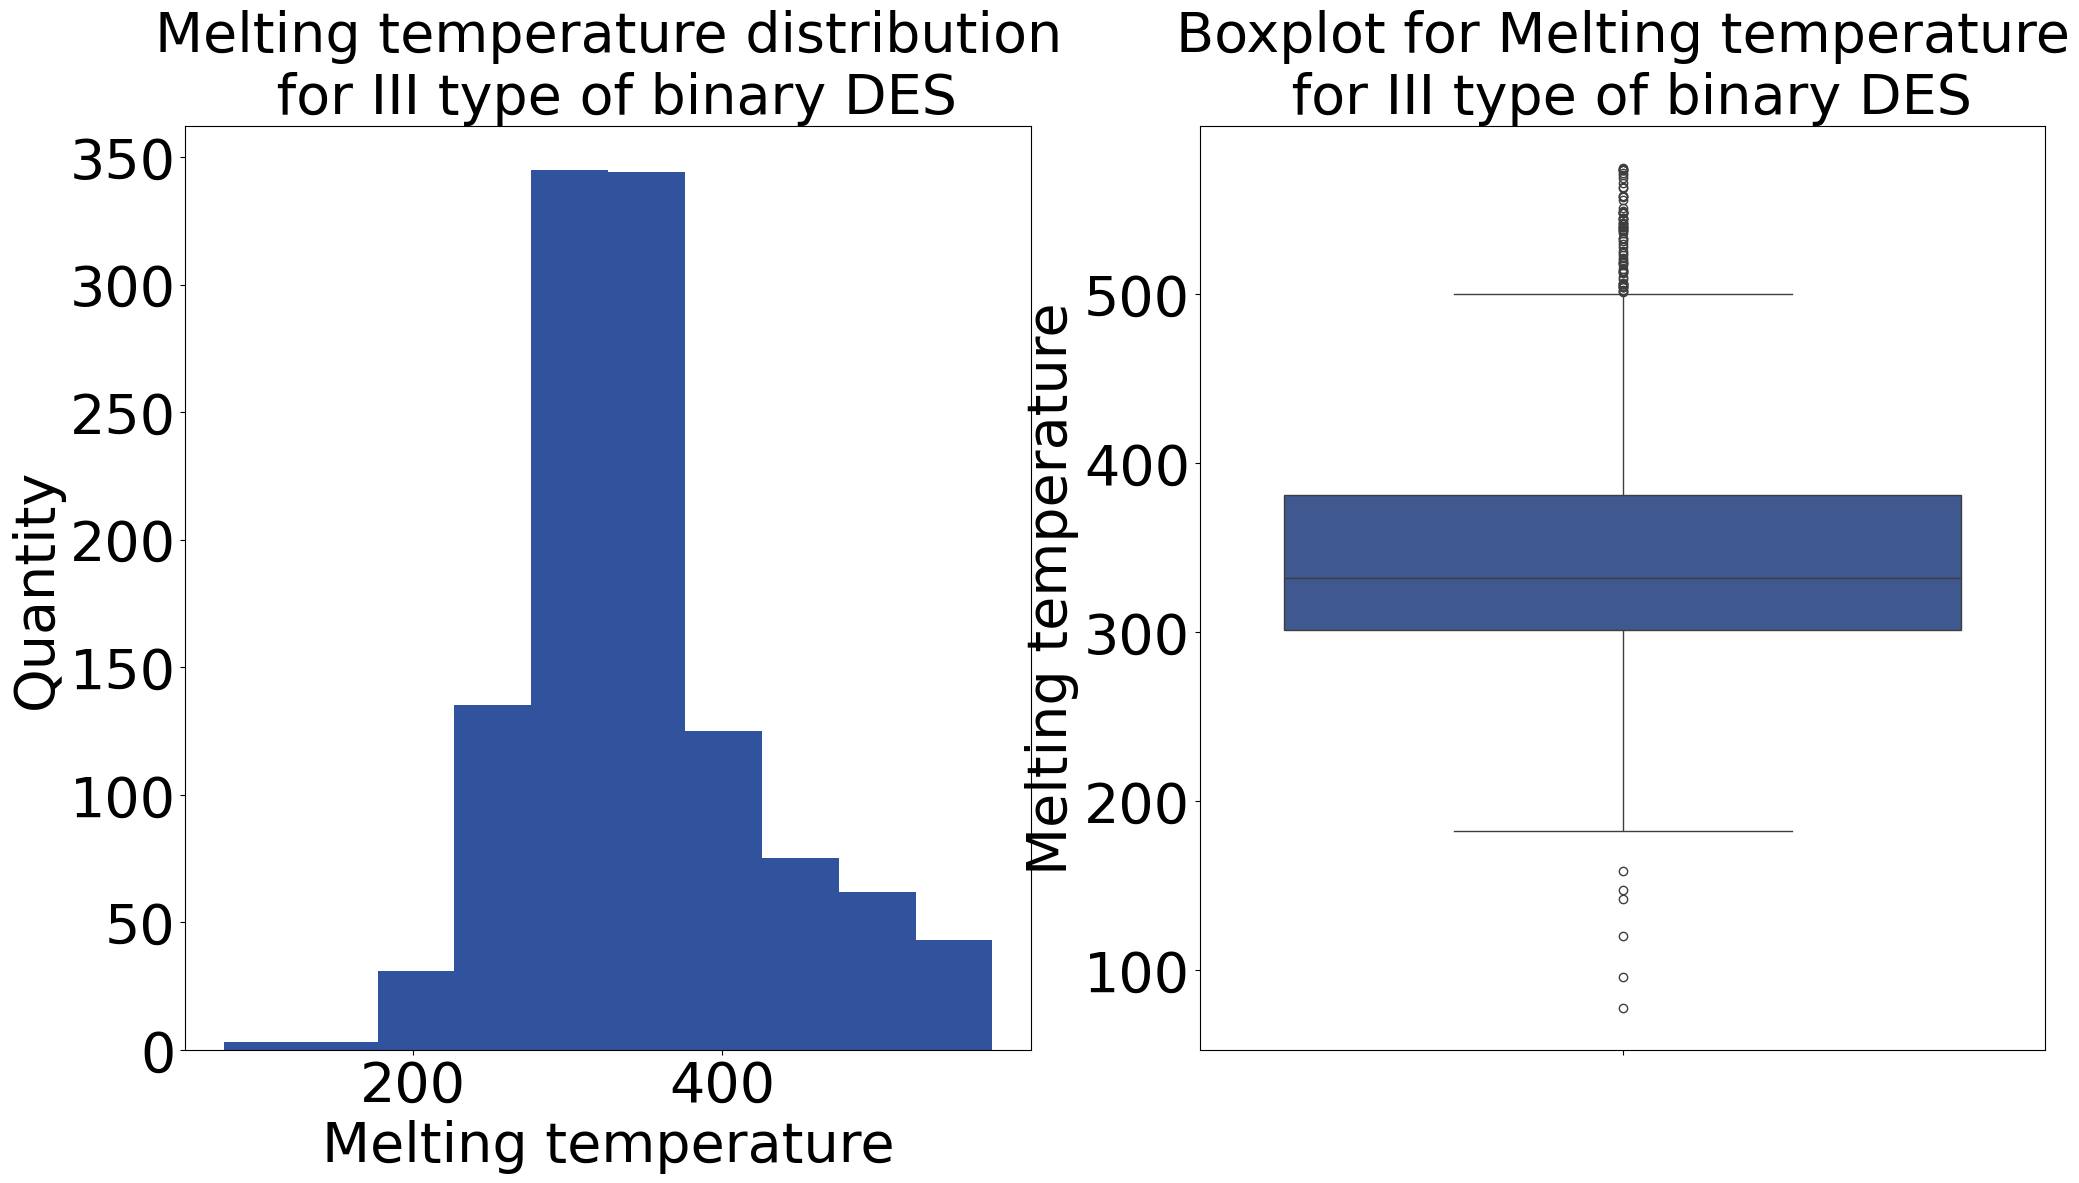

In [15]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (24, 12)) # Initialization
ax[0].hist(melt_temp_df[melt_temp_df['Type of DES'] == '3']['Melting temperature'], color = colors[2]) # Building a histogram
ax[0].set_title('Melting temperature distribution\n for III type of binary DES', fontsize=40) #Title
ax[0].set_xlabel('Melting temperature', fontsize=40) #X-axis signature
ax[0].set_ylabel('Quantity', fontsize=40) #Y-axis signature
ax[0].tick_params(axis='both', which='major', labelsize=40)
ax[1] = sns.boxplot(y = melt_temp_df[melt_temp_df['Type of DES'] == '3']['Melting temperature'], color = colors[2]) #Building a boxplot
ax[1].set_title('Boxplot for Melting temperature\n for III type of binary DES', fontsize=40) #Title
ax[1].set_ylabel('Melting temperature', fontsize=40) #Y-axis signature
ax[1].tick_params(axis='both', which='major', labelsize=40)
plt.show() #Demonstration

The distribution is close to normal, basically all values are concentrated in the range of 300-400K

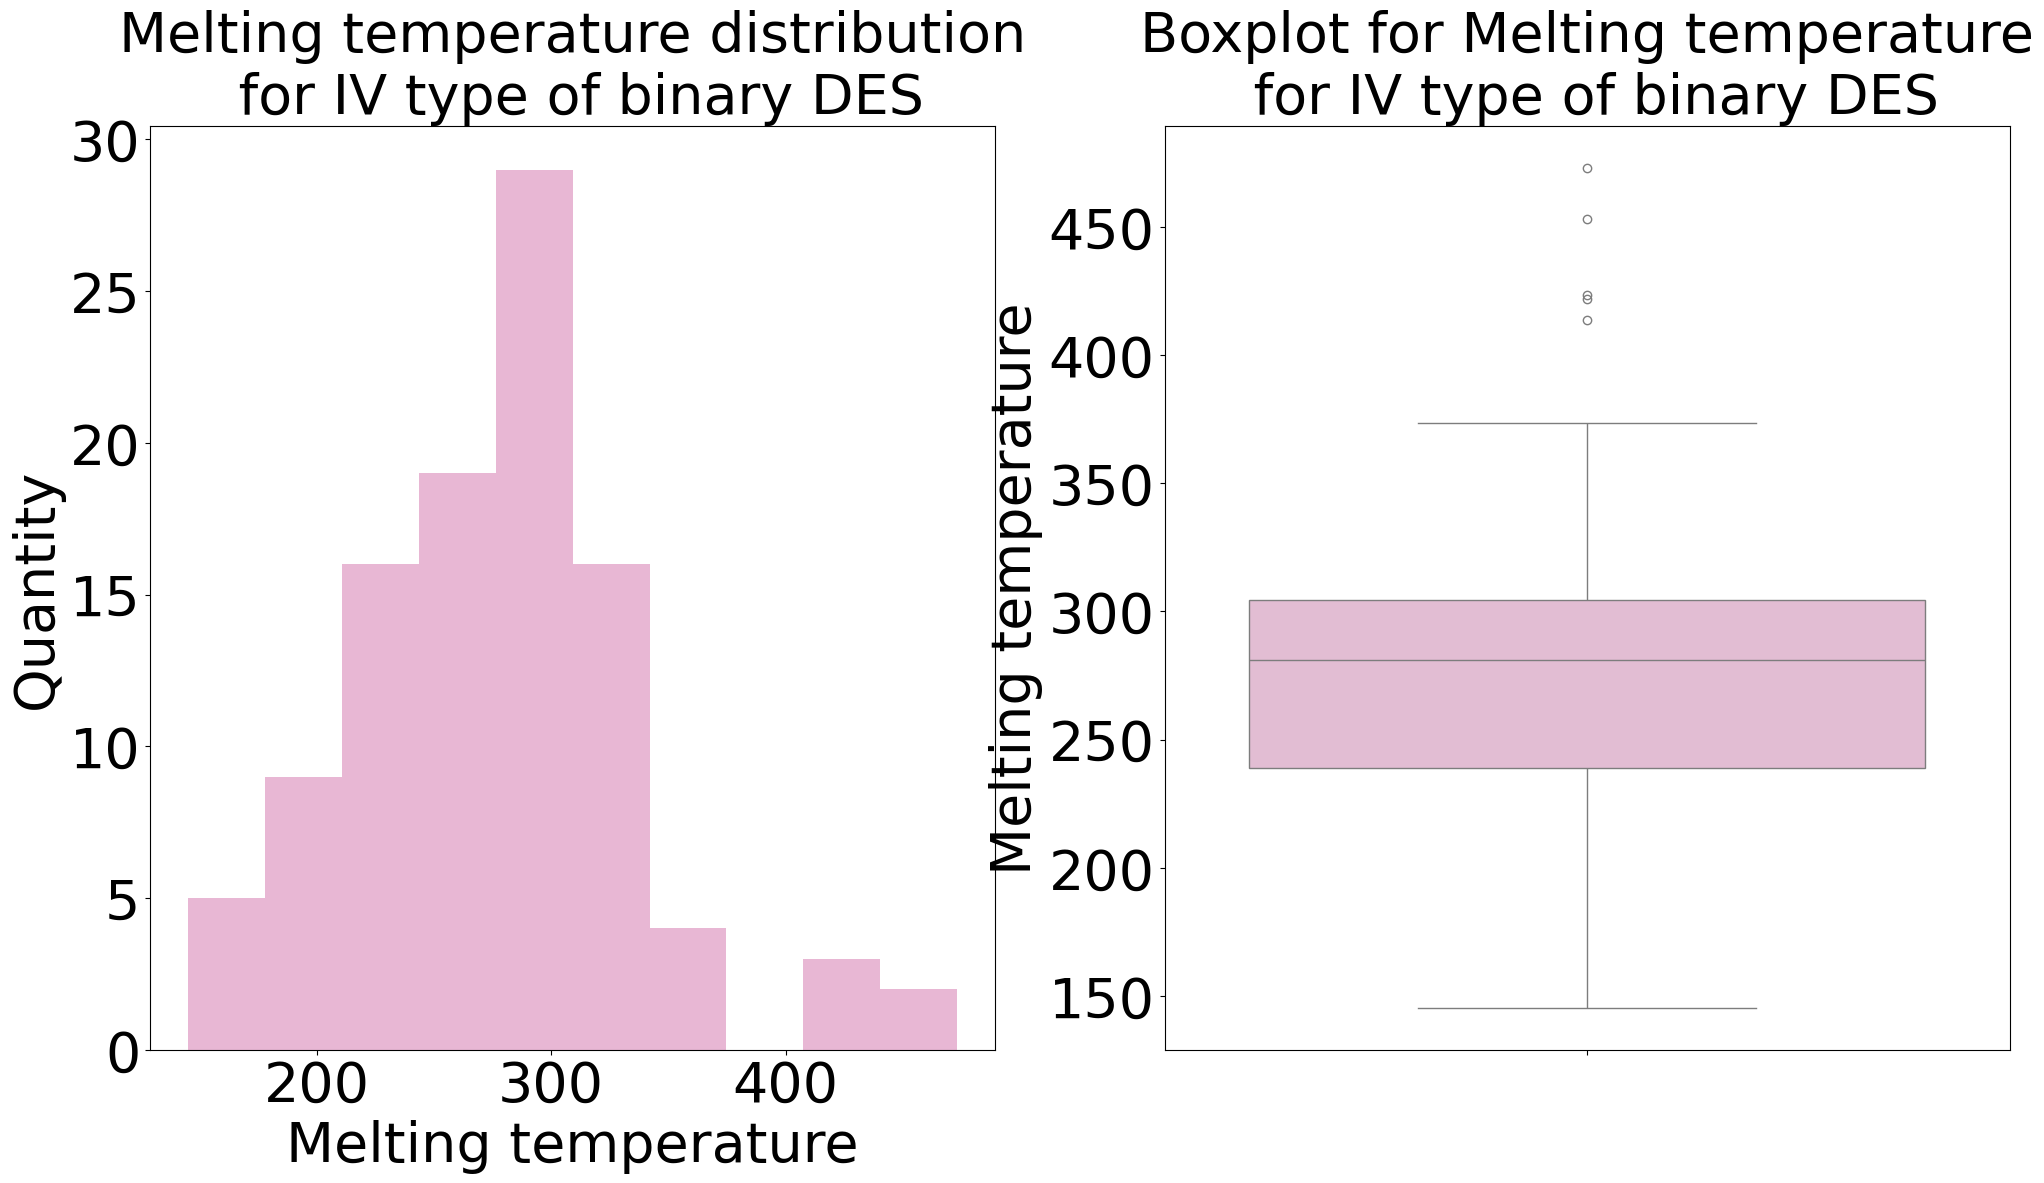

In [16]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (24, 12)) # Initialization
ax[0].hist(melt_temp_df[melt_temp_df['Type of DES'] == '4']['Melting temperature'], color = colors[3]) # Building a histogram
ax[0].set_title('Melting temperature distribution\n for IV type of binary DES', fontsize=40) #Title
ax[0].set_xlabel('Melting temperature', fontsize=40) #X-axis signature
ax[0].set_ylabel('Quantity', fontsize=40) #Y-axis signature
ax[0].tick_params(axis='both', which='major', labelsize=40)
ax[1] = sns.boxplot(y = melt_temp_df[melt_temp_df['Type of DES'] == '4']['Melting temperature'], color = colors[3]) #Building a boxplot
ax[1].set_title('Boxplot for Melting temperature\n for IV type of binary DES', fontsize=40) #Title
ax[1].set_ylabel('Melting temperature', fontsize=40) #Y-axis signature
ax[1].tick_params(axis='both', which='major', labelsize=40)
plt.show() #Demonstration

The main values are in the region 200-300, as well as emissions in the region 400+

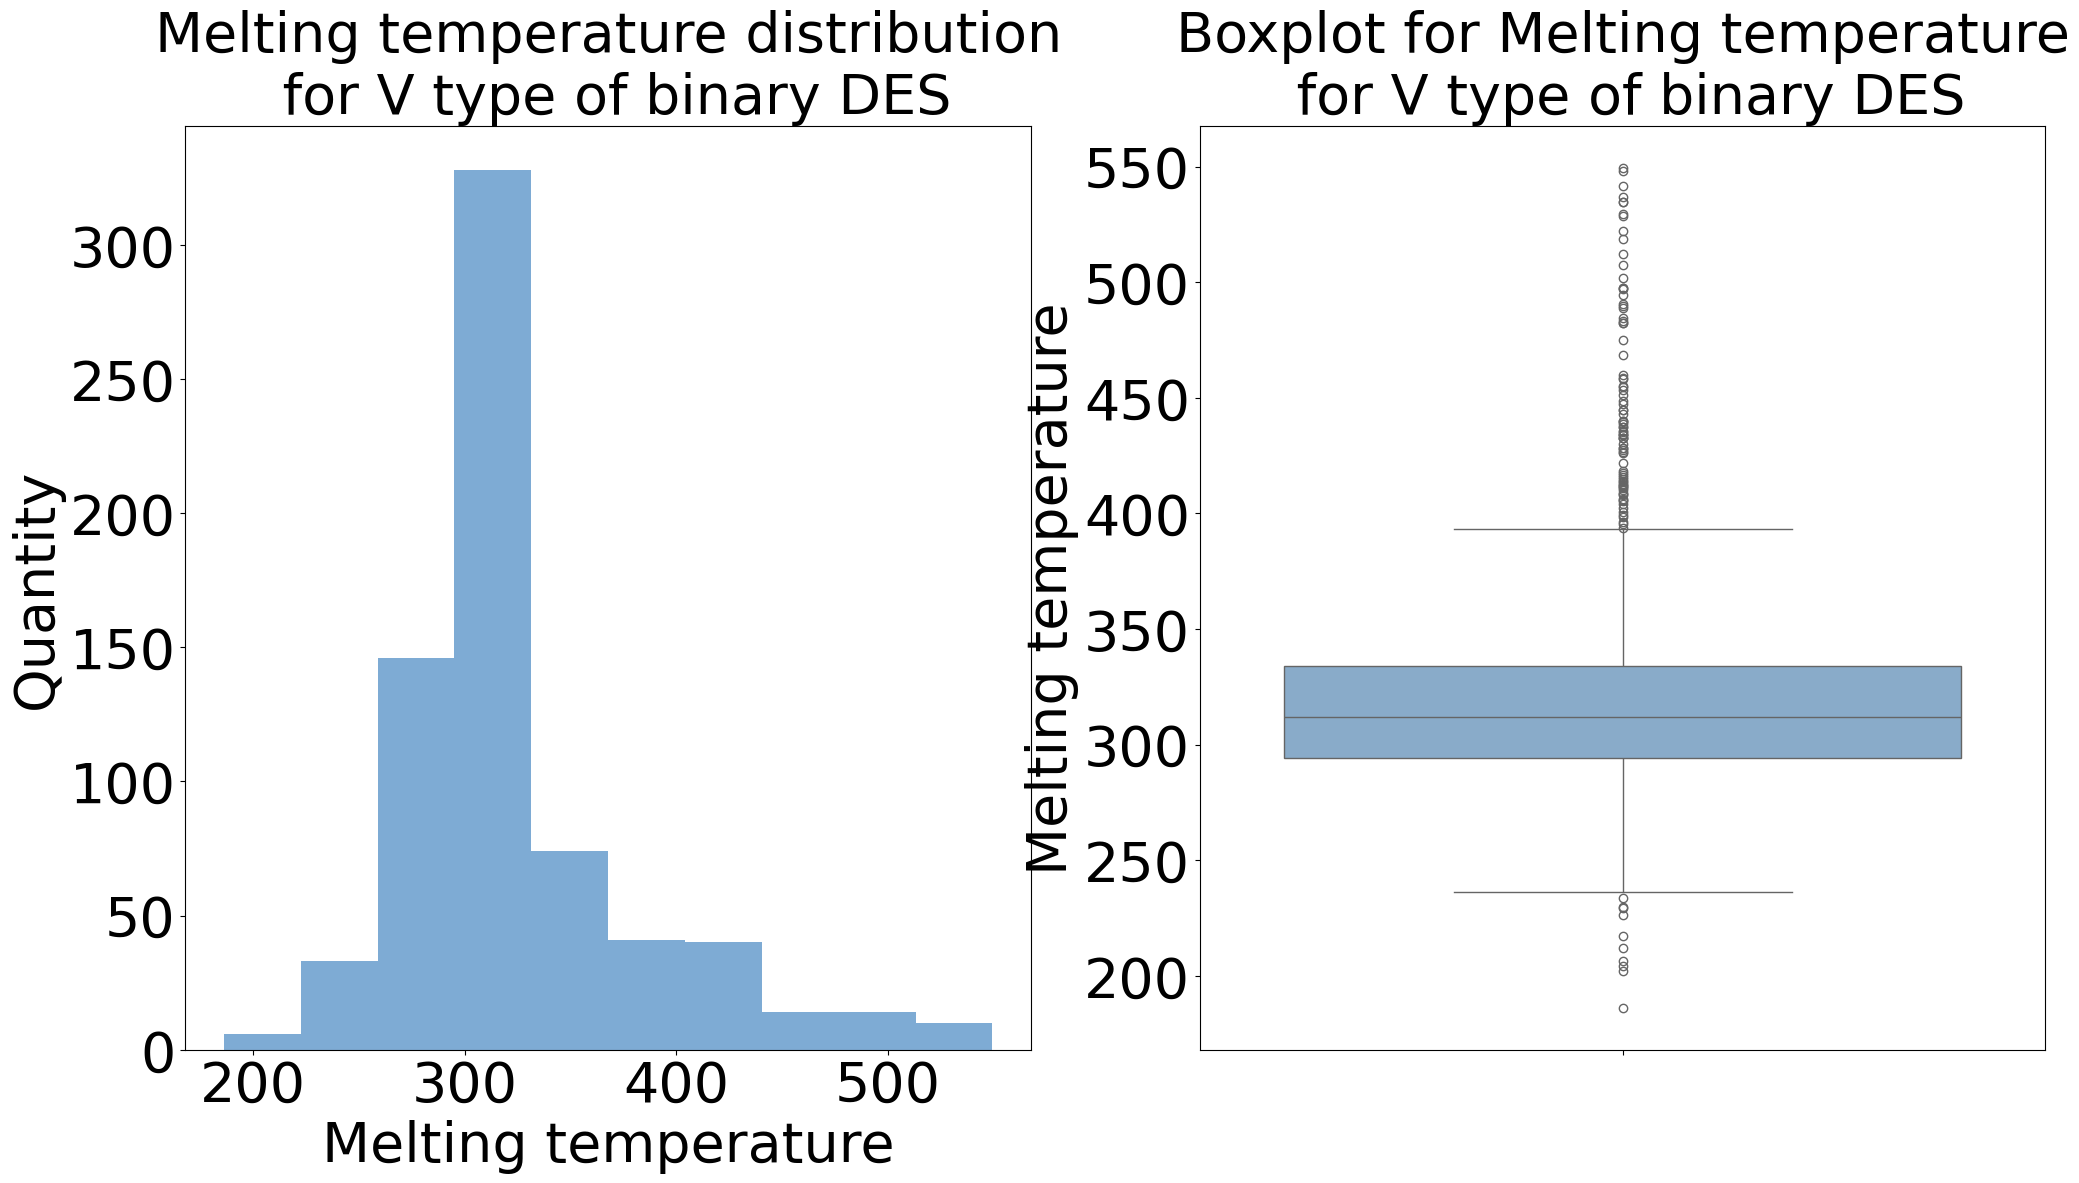

In [17]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (24, 12)) # Initialization
ax[0].hist(melt_temp_df[melt_temp_df['Type of DES'] == '5']['Melting temperature'], color = colors[4]) # Building a histogram
ax[0].set_title('Melting temperature distribution\n for V type of binary DES', fontsize=40) #Title
ax[0].set_xlabel('Melting temperature', fontsize=40) #X-axis signature
ax[0].set_ylabel('Quantity', fontsize=40) #Y-axis signature
ax[0].tick_params(axis='both', which='major', labelsize=40)
ax[1] = sns.boxplot(y = melt_temp_df[melt_temp_df['Type of DES'] == '5']['Melting temperature'], color = colors[4]) #Building a boxplot
ax[1].set_title('Boxplot for Melting temperature\n for V type of binary DES', fontsize=40) #Title
ax[1].set_ylabel('Melting temperature', fontsize=40) #Y-axis signature
ax[1].tick_params(axis='both', which='major', labelsize=40)
plt.show() #Demonstration

The distribution is close to normal, there are small outliers around 400-500K

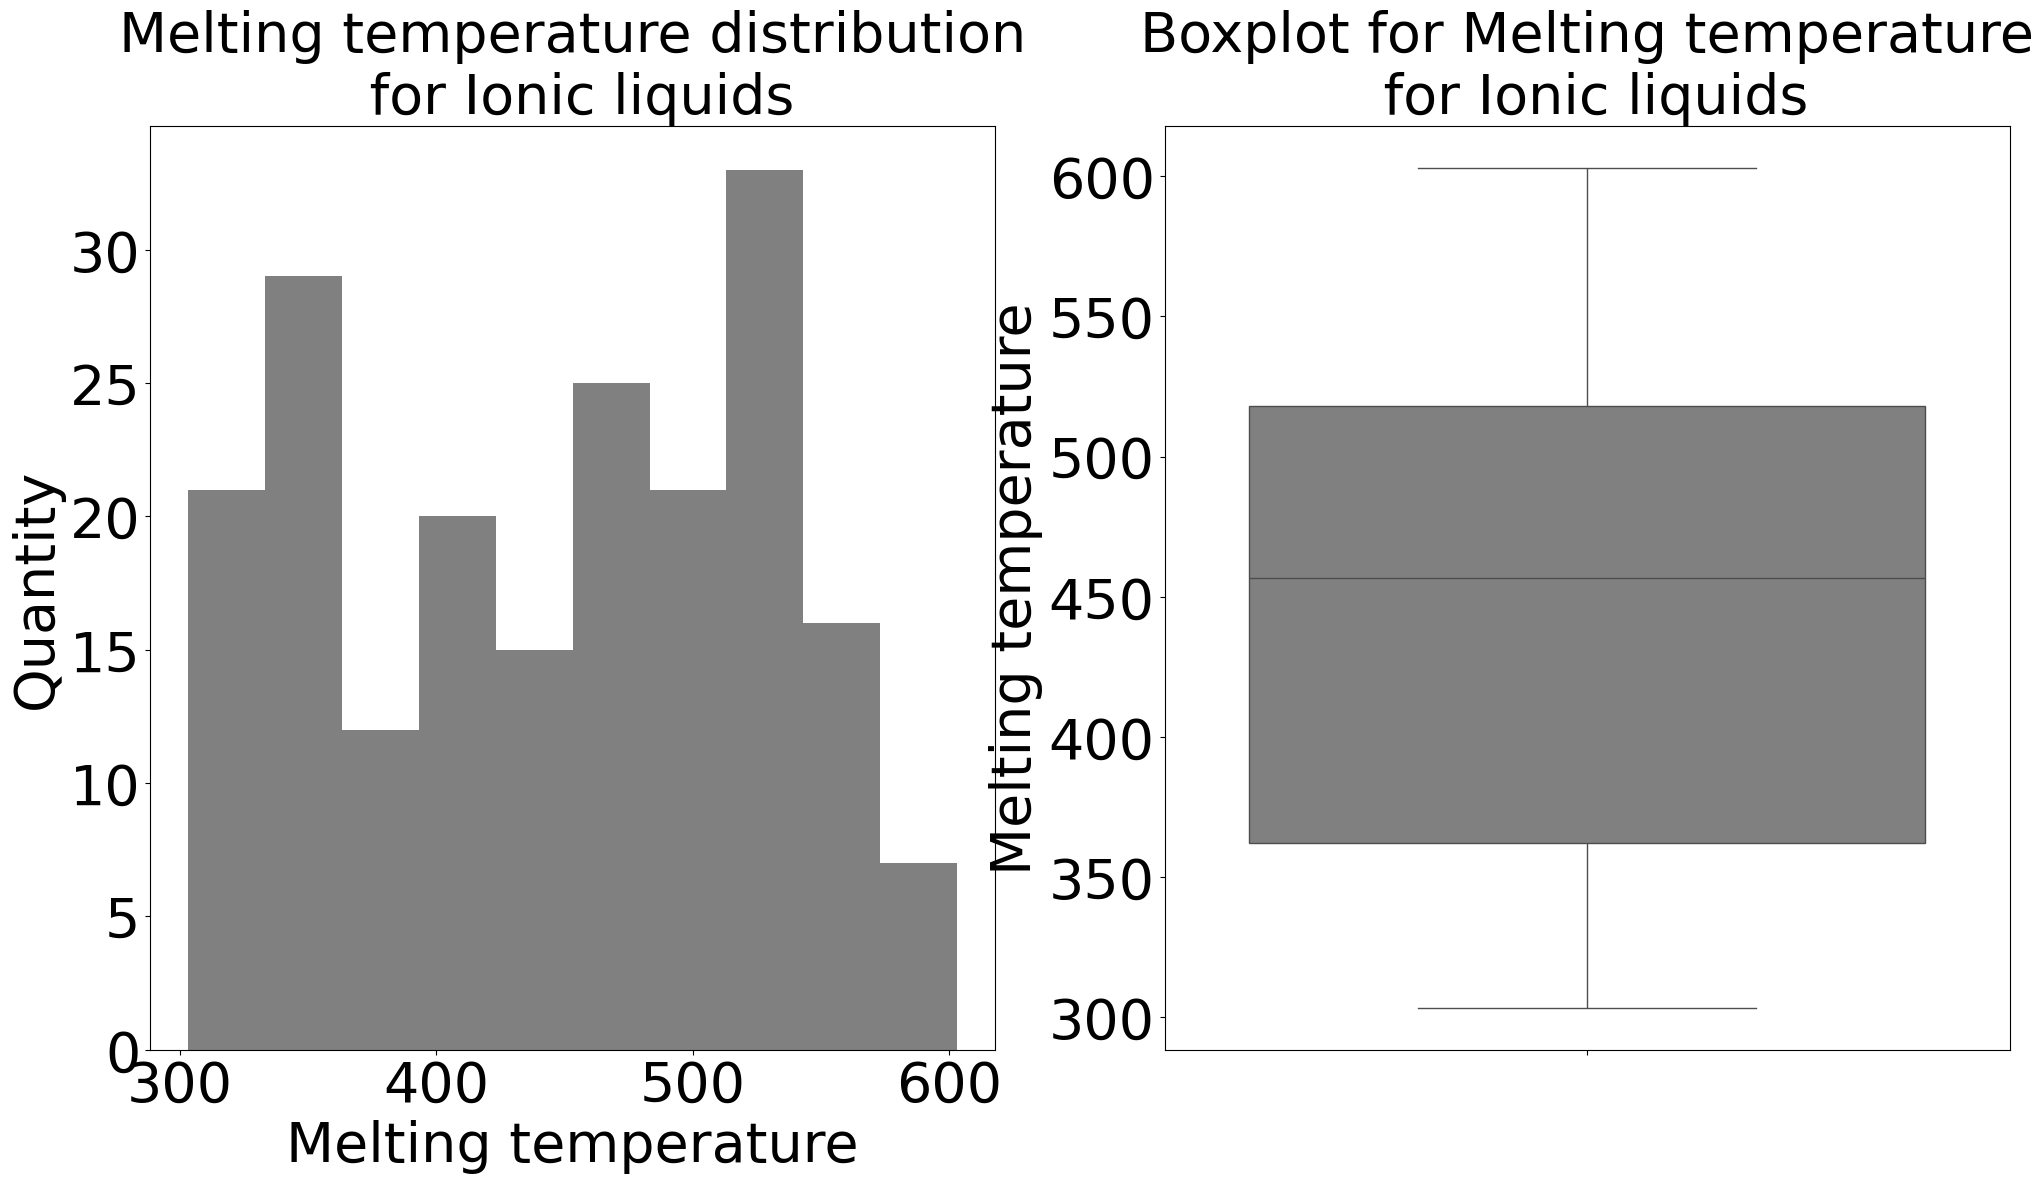

In [18]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (24, 12)) # Initialization
ax[0].hist(melt_temp_df[melt_temp_df['Type of DES'] == 'IL']['Melting temperature'], color = colors[5]) # Building a histogram
ax[0].set_title('Melting temperature distribution\n for Ionic liquids', fontsize=40) #Title
ax[0].set_xlabel('Melting temperature', fontsize=40) #X-axis signature
ax[0].set_ylabel('Quantity', fontsize=40) #Y-axis signature
ax[0].tick_params(axis='both', which='major', labelsize=40)
ax[1] = sns.boxplot(y = melt_temp_df[melt_temp_df['Type of DES'] == 'IL']['Melting temperature'], color = colors[5]) #Building a boxplot
ax[1].set_title('Boxplot for Melting temperature\n for Ionic liquids', fontsize=40) #Title
ax[1].set_ylabel('Melting temperature', fontsize=40) #Y-axis signature
ax[1].tick_params(axis='both', which='major', labelsize=40)
plt.show() #Demonstration

The largest range of values, as well as the highest maximum melting point among different types

## 2.3. Violinplots for Melting temperature of different types DES

/tmp/ipykernel_17614/3082039363.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(y = melt_temp_df['Melting temperature'], x = melt_temp_df['Type of DES'], palette = colors) #Building a violinplot


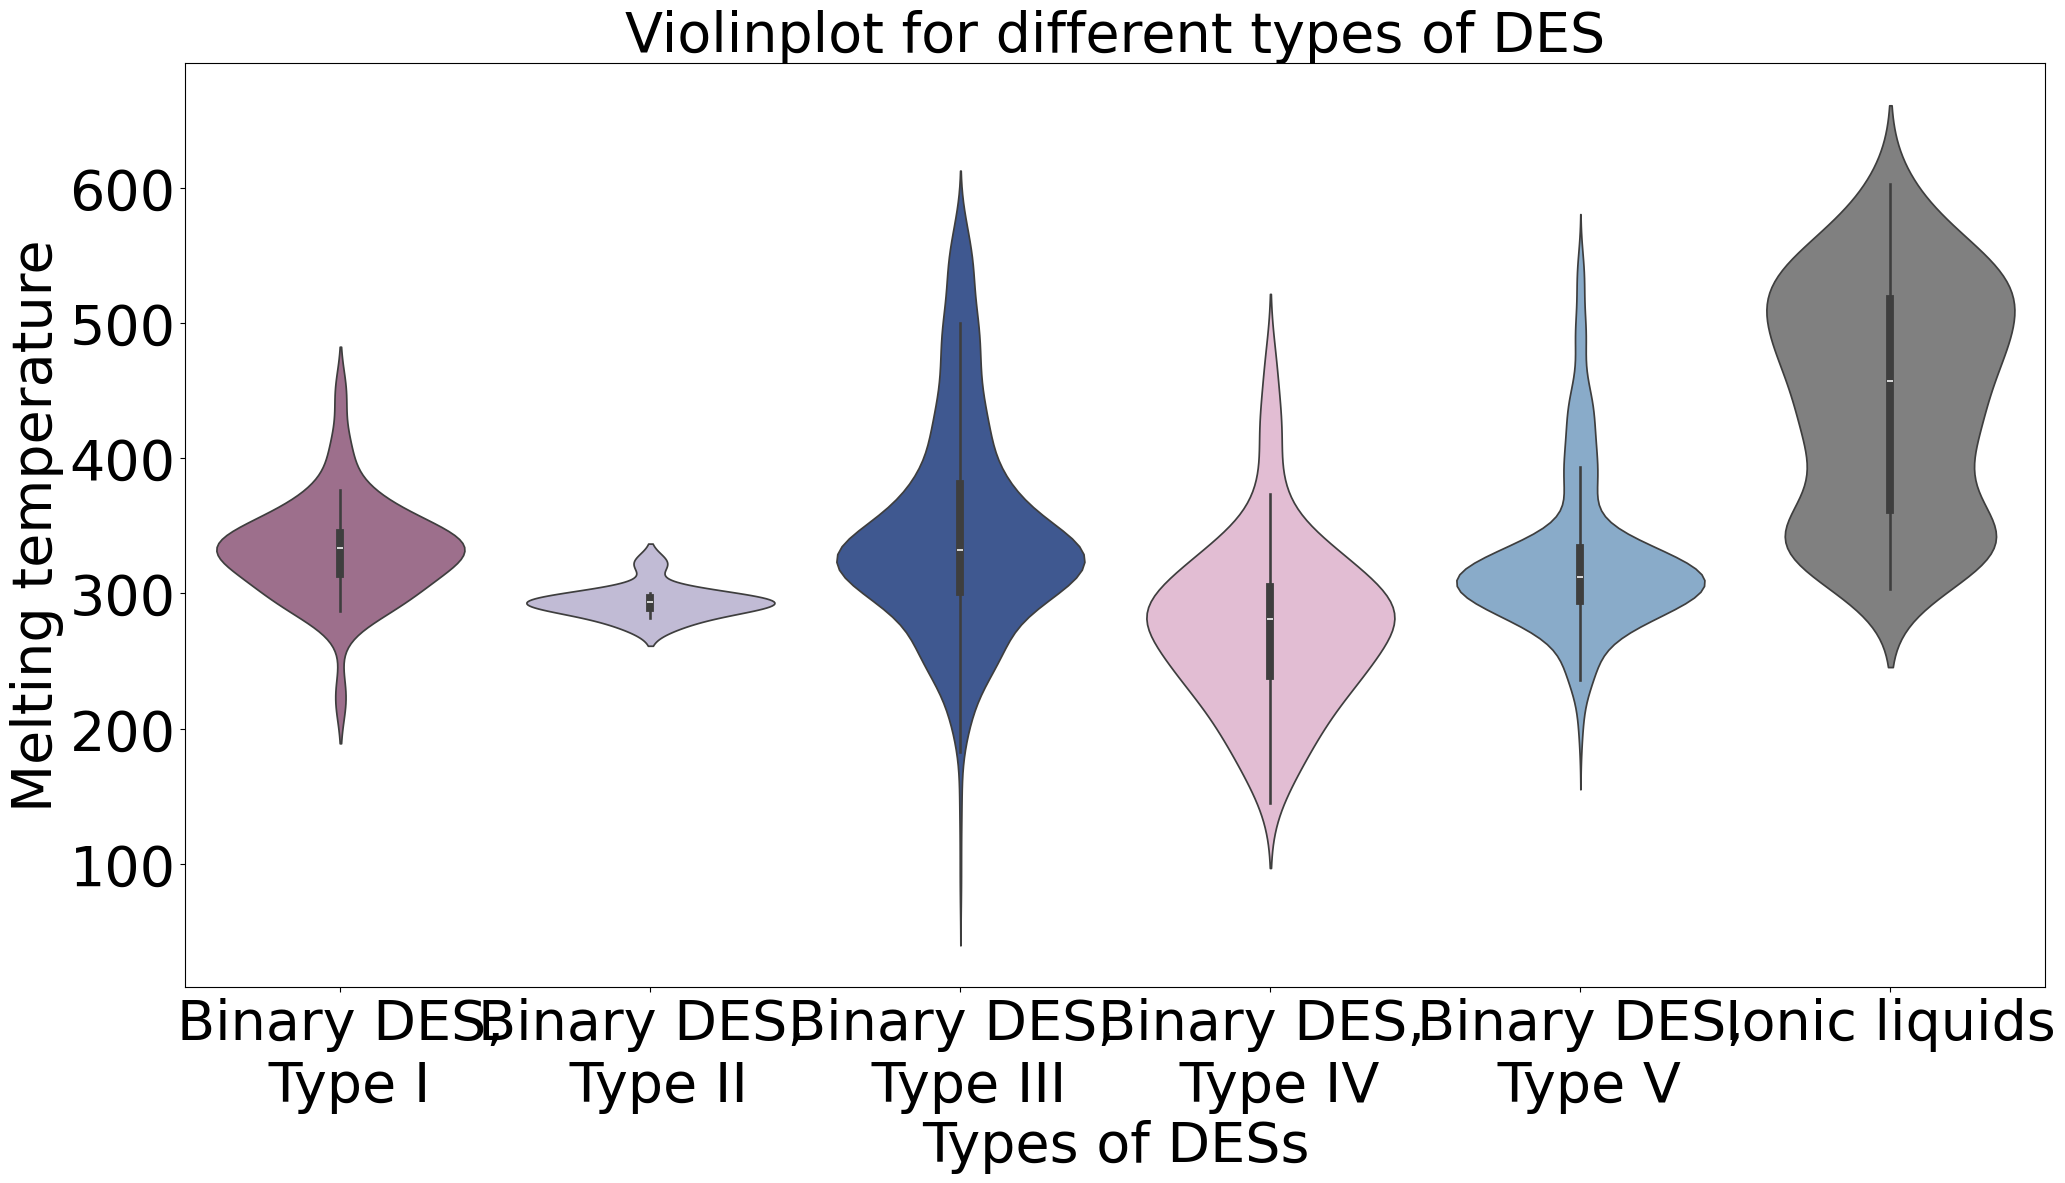

In [19]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (24, 12)) # Initialization
ax = sns.violinplot(y = melt_temp_df['Melting temperature'], x = melt_temp_df['Type of DES'], palette = colors) #Building a violinplot
ax.set_xticks([0, 1,2,3,4, 5], labels= ['Binary DES,\n Type I', 'Binary DES, \n Type II', 'Binary DES, \n Type III', 'Binary DES, \n Type IV', 'Binary DES,\n Type V', 'Ionic liquids'])
ax.set_title('Violinplot for different types of DES', fontsize=40) #Title
ax.set_ylabel('Melting temperature', fontsize=40) #Y-axis signature
ax.set_xlabel('Types of DESs', fontsize=40) #X-axis signature
ax.tick_params(axis='both', which='major', labelsize=40)
plt.show() #Demonstration

It was shown that the distributions closest to normal are those of DES types III and V. It can also be noted that the lowest average melting points have type IV compounds

## 2.4. Statistical tests
### 2.4.1. Shapiro-Wilk

In [20]:
from scipy.stats import shapiro
data = melt_temp_df['Melting temperature']
stat, p = shapiro(data)
print
print(stat, p)
print('stat={0:.3f}, p={0:.3f}' .format(stat, p))
if p > 0.05:
    print(p)
    print('Probably Gaussian')
else:
    print(p)
    print('Probably not Gaussian')

0.9197279129240448 2.756375764227472e-35
stat=0.920, p=0.920
2.756375764227472e-35
Probably not Gaussian


### 2.4.2. Jarque-Bera test

In [21]:
from scipy.stats import jarque_bera
print(jarque_bera(data))

SignificanceResult(statistic=np.float64(514.5052769306272), pvalue=np.float64(1.8905956724411265e-112))


Both tests have a low p-value and a high stat value, so the null hypothesis is rejected, our distribution is not normal